# Think Bayes
* Code and exercises from `Think Bayes`, 2e, by **Allen B. Downey** (2016) 
* https://github.com/AllenDowney/ThinkBayes2/blob/master/README.md

## The Cookie Problem
* Bowl 1: 30 vanilla cookies, 10 chocolate cookies
* Bowl 2: 20 vanilla cookies, 20 chocolate cookies
* Choose one bowl, and select a cookie at random: it is vanilla
* What is probability the cookie came from Bowl 1?

## Conditional probability: p(Bowl1 | vanilla)
* Easy to find probability of vanilla cookie, given bowl 1
* P(vanilla | Bowl 1) = 3/4
* However, p(A|B) is not the same as p(B|A)

# Bayes' Theorem: `P(A|B) = P(B|A)P(A)/P(B)`


## Diachronic Interpretation: `P(h|D) = P(D|h)P(h)/P(D)`
Way to update the probability of a hypothesis, H, in light of some data, D. 
* Prior probability **p(H)**: probability of hypothesis before we see the data
* Posterior probability **p(H|D)**: probability of hypothesis after we see the data.
* Likelihood **p(D|H)**: probability of the data under the hypothesis
* Normalizing constant **p(D)**: probability of the data under any hypothesis

### Prior Probability P(H)
* Sometimes computed based on background info
* Prior can be subjective, reasonable people can disagree

### Likelihood
* Easy to compute

### Normalizing constant
* Can be tricky to compute, hard to nail down
* P(D) = p(B1) p(D|B1) + p(B2) p(D|B2

## Problems of Conditional Probability
* For many problems, Bayes' theorem provides a divide-and-conquer strategy
* If p(A|B) is hard to compute or measure experimentally, check whether it is easier to compute the other terms in Bayes' theorem: p(B|A), p(A), p(B)

## Ch.2 Computational Statistics
* Distribution - set of values and corresponding probabilities
* Represent a distribution using a dictionary that mapss each value to its probability

In [1]:
import thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr'

## Probability Mass Function (pmf)
* Make Pmf that represents outcome of six-sided die. 
* Initially there are 6 values with equal probability.
* Probabilities have to add up to 1.0

In [2]:
pmf = Pmf()
for x in [1,2,3,4,5,6]:
    pmf[x] = 1

pmf.Normalize()
pmf.Print()

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


To extract a probability from a Pmf object, use Prob() function or bracket notation

In [3]:
pmf.Prob(1)

0.16666666666666666

In [4]:
pmf[5]

0.16666666666666666

## PMF for Cookie Problem 
Prior distribution
pUse multi to udate it

In [5]:
pmf = Pmf()
pmf['Bowl 1'] = 0.5
pmf['Bowl 2'] = 0.5
pmf.Print()

Bowl 1 0.5
Bowl 2 0.5


In [6]:
pmf.Mult('Bowl 1', 0.75)
pmf.Mult('Bowl 2', 0.5)
pmf.Print()

Bowl 1 0.375
Bowl 2 0.25


In [7]:
#pmf = Pmf(['Bowl 1', 'Bowl 2'])
#or

pmf['Bowl 1'] *= 0.75
pmf['Bowl 2'] *= 0.5
pmf.Print()

Bowl 1 0.28125
Bowl 2 0.125


In [8]:
pmf.Normalize()
pmf.Print()

Bowl 1 0.6923076923076923
Bowl 2 0.3076923076923077


## Bayesian Framework
* Same computation encapsulated in a class
* Confirm that we get the same result
* More general implmentation

In [9]:
class Cookie(Pmf):
    """A map from string bowl ID to probablity."""

    def __init__(self, hypos):
        """Initialize self.

        hypos: sequence of string bowl IDs
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()

    def Update(self, data):
        """Updates the PMF with new data.

        data: string cookie type
        """
        for hypo in self.Values():
            self[hypo] *= self.Likelihood(data, hypo)
        self.Normalize()

    mixes = {
        'Bowl 1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl 2':dict(vanilla=0.5, chocolate=0.5),
    }

    def Likelihood(self, data, hypo):
        """The likelihood of the data under the hypothesis.

        data: string cookie type
        hypo: string bowl ID
        """
        mix = self.mixes[hypo]
        like = mix[data]
        return like

In [10]:
pmf = Cookie(['Bowl 1', 'Bowl 2'])
pmf.Update('vanilla')
pmf.Print()

Bowl 1 0.6000000000000001
Bowl 2 0.4


In [11]:
dataset = ['vanilla', 'chocolate', 'vanilla']
for data in dataset:
    pmf.Update(data)
    
pmf.Print()

Bowl 1 0.627906976744186
Bowl 2 0.37209302325581395


## The `Suite` class
Most Bayesian updates look pretty much the same, especially the Update method. So we can encapsulate the framework in a class, `Suite`, and create new classes that extend it.

Represents a suite of hypotheses and their probabilities.

Child classes of Suite inherit Update and provide Likelihood.
The short version of the algorithm for the `Monty problem` is given below.

In [12]:
%psource Suite

In [13]:
class Monty(Suite):

    def Likelihood(self, data, hypo):
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1

In [14]:
pmf = Monty('ABC')
pmf.Update('B')
pmf.Print()

A 0.3333333333333333
B 0.0
C 0.6666666666666666


## M&M Problem
Mars, Inc. makes M&Ms in a variety of colors and changes the mix of colors from time to time. In 1995, they introduced blue M&Ms. Before 1995, the color mix in a bag of plain M&Ms was: 
* 30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan. 

After 1995 the color mix in a bag of plain M&Ms was:
* 24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown.

Two bags of M&Ms, one from 1994 and one from 1996. Select one M&M from each bag. One is yellow and one is green. What is the probability that the yellow one came from the 1994 bag? 

In [16]:
class M_and_M(Suite):
    """Map from hypothesis (A or B) to probability."""

    mix94 = dict(brown=30,
                 yellow=20,
                 red=20,
                 green=10,
                 orange=10,
                 tan=10,
                 blue=0)

    mix96 = dict(blue=24,
                 green=20,
                 orange=16,
                 yellow=14,
                 red=13,
                 brown=13,
                 tan=0)

    hypoA = dict(bag1=mix94, bag2=mix96)
    hypoB = dict(bag1=mix96, bag2=mix94)

    hypotheses = dict(A=hypoA, B=hypoB)

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: string hypothesis (A or B)
        data: tuple of string bag, string color
        """
        bag, color = data
        mix = self.hypotheses[hypo][bag]
        like = mix[color]
        return like

### Here is an `update`

In [17]:
suite = M_and_M('AB')
suite.Update(('bag1', 'yellow'))
suite.Update(('bag2', 'green'))
suite.Print()

A 0.7407407407407407
B 0.2592592592592592


**Exercise:** Suppose you draw another M&M from bag1 and it's blue. 
* What can you conclude? Run the update to confirm your intuition.

In [18]:
suite.Update(('bag1', 'blue'))
suite.Print()

A 0.0
B 1.0


# Ch 4. The Euro problem

## Problem statement here

In [20]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot

## Coin Toss 
* A class presents the hypohteses about the probability that a coin lands heads. 

In [21]:
class Euro(Suite):

    def Likelihood(self, data, hypo):
        """Computes the likelihood of `data` given `hypo`.
        
        data: string 'H' or 'T'
        hypo: probability of heads, 0-100
        
        returns: float
        """
        x = hypo
        if data == 'H':
            return x/100
        else:
            return 1 - x/100

### Make a uniform prior and update it with 140 heads and 110 tails:

In [22]:
suite = Euro(range(0, 101))
dataset = 'H' * 140 + 'T' * 110

for data in dataset:
    suite.Update(data)

### The posterior looks like this: 

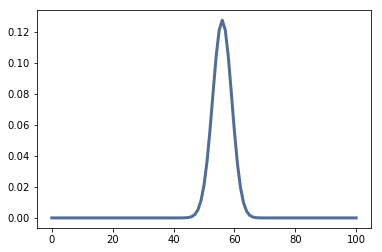

In [23]:
thinkplot.Pdf(suite)

## Summarize the posterior several ways, including the mean:
* Mean, meadian
* 90% interval

In [24]:
suite.Mean()

55.952380952380956

In [25]:
suite.Percentile(50)

56

In [26]:
suite.CredibleInterval(90)

(51, 61)

### Look up a particular value in the posterior PMF
* but the result doesn't mean much, because we could have divided the range (0-100) into as many pieces as we like, and the result would be different.

In [27]:
suite.Prob(50)

0.02097652612954468

## Different priors
Let's see how that looks with different priors.
Here's a function that makes a uniform prior:

In [28]:
def UniformPrior(label='uniform'):
    """Makes a Suite with a uniform prior."""
    suite = Euro(range(0, 101), label=label)
    return suite

In [29]:
def TrianglePrior(label='triangle'):
    """Makes a Suite with a triangle prior."""
    suite = Euro(label=label)
    for x in range(0, 51):
        suite[x] = x
    for x in range(51, 101):
        suite[x] = 100-x 
    suite.Normalize()
    return suite

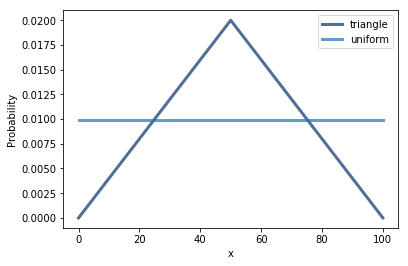

In [30]:
triangle = TrianglePrior()
uniform = UniformPrior()
suites = [triangle, uniform]

thinkplot.Pdfs(suites)
thinkplot.Config(xlabel='x', ylabel='Probability')

In [ ]:
Update them both with the same data:

In [31]:
def RunUpdate(suite, heads=140, tails=110):
    """Updates the Suite with the given number of heads and tails.

    suite: Suite object
    heads: int
    tails: int
    """
    dataset = 'H' * heads + 'T' * tails
    for data in dataset:
        suite.Update(data)

In [32]:
for suite in suites:
    RunUpdate(suite)

### Results are almost identical; 
* The remaining difference is unlikely to matter in practice.

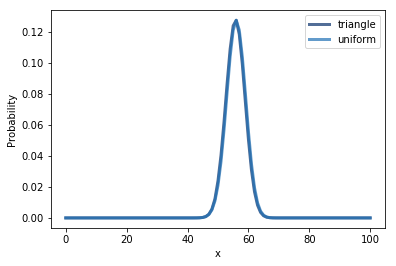

In [33]:
thinkplot.Pdfs(suites)
thinkplot.Config(xlabel='x', ylabel='Probability')

## Ch 11: More efficient version of Euro class 
* Takes the dataset in a more compact form and uses the binomial distribution (ignoring the binomial coefficient because it does not depend on x).

In [34]:
class Euro(Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like

### If the coin is fair, we can evaluate the likelihood of the data directly.

In [35]:
data = 140, 110

suite = Euro()
like_f = suite.Likelihood(data, 50)
print('p(D|F)', like_f)

p(D|F) 5.527147875260445e-76


If we pretend the alternative hypothesis is exactly the observed proportion, we can compute the likelihood of the data and the likelihood ratio, relative to the fair coin.

In [36]:
actual_percent = 100.0 * 140 / 250
likelihood = suite.Likelihood(data, actual_percent)
print('p(D|B_cheat)', likelihood)
print('p(D|B_cheat) / p(D|F)', likelihood / like_f)

p(D|B_cheat) 3.358289985239045e-75
p(D|B_cheat) / p(D|F) 6.075990838368512


### Under this interpretation, the data are in favor of "biased", with K=6. 
* But that's a cheat.
* Suppose we think "biased" means either 0.4 or 0.6, but we're not sure which. 
* The total likelihood of the data is the weighted average of the two likelihoods.

In [37]:
like40 = suite.Likelihood(data, 40)
like60 = suite.Likelihood(data, 60)
likelihood = 0.5 * like40 + 0.5 * like60
print('p(D|B_two)', likelihood)
print('p(D|B_two) / p(D|F)', likelihood / like_f)

p(D|B_two) 7.357772729537146e-76
p(D|B_two) / p(D|F) 1.3312060570100888


### Under this interpretation, the data are in favor of "biased", but very weak.
* More generally, if "biased" refers to a range of possibilities with different probabilities, the total likelihood of the data is the weighted sum:

In [42]:
def SuiteLikelihood(suite, data):
    """Computes the weighted average of likelihoods for sub-hypotheses.

    suite: Suite that maps sub-hypotheses to probability
    data: some representation of the data
   
    returns: float likelihood
    """
    total = 0
    for hypo, prob in suite.Items():
        like = suite.Likelihood(data, hypo)
        total += prob * like
    return total

Here's what it looks like if "biased" means "equally likely to be any value between 0 and 1".

In [43]:
b_uniform = Euro(range(0, 101))
b_uniform.Remove(50)
b_uniform.Normalize()
likelihood = SuiteLikelihood(b_uniform, data)
print('p(D|B_uniform)', likelihood)
print('p(D|B_uniform) / p(D|F)', likelihood / like_f)

p(D|B_uniform) 2.5796490229198124e-76
p(D|B_uniform) / p(D|F) 0.4667233591607601


By that definition, the data are evidence against the biased hypothesis, with K=2.
But maybe a triangle prior is a better model of what "biased" means.

In [44]:
def TrianglePrior():
    """Makes a Suite with a triangular prior."""
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    return suite

In [45]:
b_tri = TrianglePrior()
b_tri.Remove(50)
b_tri.Normalize()
likelihood = b_tri.Update(data)
print('p(D|B_tri)', likelihood)
print('p(D|B_tri) / p(D|F)', likelihood / like_f)

p(D|B_tri) 4.617204636646646e-76
p(D|B_tri) / p(D|F) 0.8353683926774039


By the triangle definition of "biased", the data are very weakly in favor of "fair".

## Normalizing constant
* We don't really need the SuiteLikelihood function, because `Suite.Update` already computes the total probability of the data, which is the normalizing constant.

In [47]:
likelihood = SuiteLikelihood(b_uniform, data)
likelihood

2.5796490229198124e-76

In [48]:
euro = Euro(b_uniform)
euro.Update(data)

2.579649022919812e-76

In [49]:
likelihood = SuiteLikelihood(b_tri, data)
likelihood

2.4249639967038797e-75

In [50]:
euro = Euro(b_tri)
euro.Update(data)

2.4249639967038797e-75

This observation is the basis of hierarchical Bayesian models, of which this solution to the Euro problem is a simple example.